In [1]:
from pydriller import Repository
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
repositorio = "https://github.com/facebook/docusaurus.git"

In [3]:
commits = []

for commit in Repository(repositorio).traverse_commits():
    record = {
        'hash': commit.hash,
        'message': commit.msg,
        'author_name': commit.author.name,
        'author_email': commit.author.email,
        'author_date': commit.author_date,
        'committer_name': commit.committer.name,
        'committer_email': commit.committer.email,
        'committer_date': commit.committer_date,
       
            }
    commits.append(record)

# Save it to FileCommits.csv
df_commits = pd.DataFrame(commits)

In [7]:
df_commits.to_csv('DF Commits Docusaurus.csv', index=False)

In [2]:
df_commits = pd.read_csv("DF Commits Docusaurus.csv")

In [3]:
df_commits

,hash,message,author_name,author_email,author_date,committer_name,committer_email,committer_date
0,e3139eea2f8e59ffa9566ae8e9438500f9fbdfa1,Initial commit,Joel Marcey,joelm@fb.com,2017-07-07 10:28:29-07:00,Joel Marcey,joelm@fb.com,2017-07-07 10:28:29-07:00
1,fe7d386f6711ceee5cf91e438fc066b93c6202a9,Add translation babel plugins and module to ge...,Frank Li,frankli1@fb.com,2017-07-07 15:18:52-07:00,Frank Li,frankli1@fb.com,2017-07-07 15:18:52-07:00
2,d620f2e6dd004e092106739046585f1e95af563e,Use babylon and babel-traverse directly to fin...,Frank Li,frankli1@fb.com,2017-07-07 18:15:06-07:00,Frank Li,frankli1@fb.com,2017-07-07 18:15:06-07:00
3,6e1d5579fc778e6c25f1c01bd745792ab74d4b37,Merge branch 'deltice' of https://github.com/f...,Frank Li,frankli1@fb.com,2017-07-07 18:27:52-07:00,Frank Li,frankli1@fb.com,2017-07-07 18:27:52-07:00
4,dbbfecaf6283d0e1d82eeccc2ecbe31bacf39f8d,Remove find-strings-plugin,Frank Li,frankli1@fb.com,2017-07-07 18:34:09-07:00,Frank Li,frankli1@fb.com,2017-07-07 18:34:09-07:00
...,...,...,...,...,...,...,...,...
6098,5400690108ccaa63de008fd37776f1b7558d4e77,docs: rename Facebook to Meta in GitHub-relate...,Raghav,raghavawasthi2005@gmail.com,2024-10-09 08:17:53+01:00,GitHub,noreply@github.com,2024-10-09 09:17:53+02:00
6099,c7fd8d17028212c3858fbd227f4316cf341dacae,fix(core): move @docusaurus/faster to bundler ...,Sébastien Lorber,slorber@users.noreply.github.com,2024-10-10 17:14:14+02:00,GitHub,noreply@github.com,2024-10-10 17:14:14+02:00
6100,74c09aee3564e96a9b11e4022f60f3c0ef305d6f,feat(core): Replace Webpack with Rspack - `sit...,Sébastien Lorber,slorber@users.noreply.github.com,2024-10-11 10:50:24+02:00,GitHub,noreply@github.com,2024-10-11 10:50:24+02:00
6101,97e6c420998891dceaa492b7f252eb7ed11c1aa2,refactor(core): remove useless Webpack wait pl...,Sébastien Lorber,slorber@users.noreply.github.com,2024-10-11 16:02:42+02:00,GitHub,noreply@github.com,2024-10-11 16:02:42+02:00


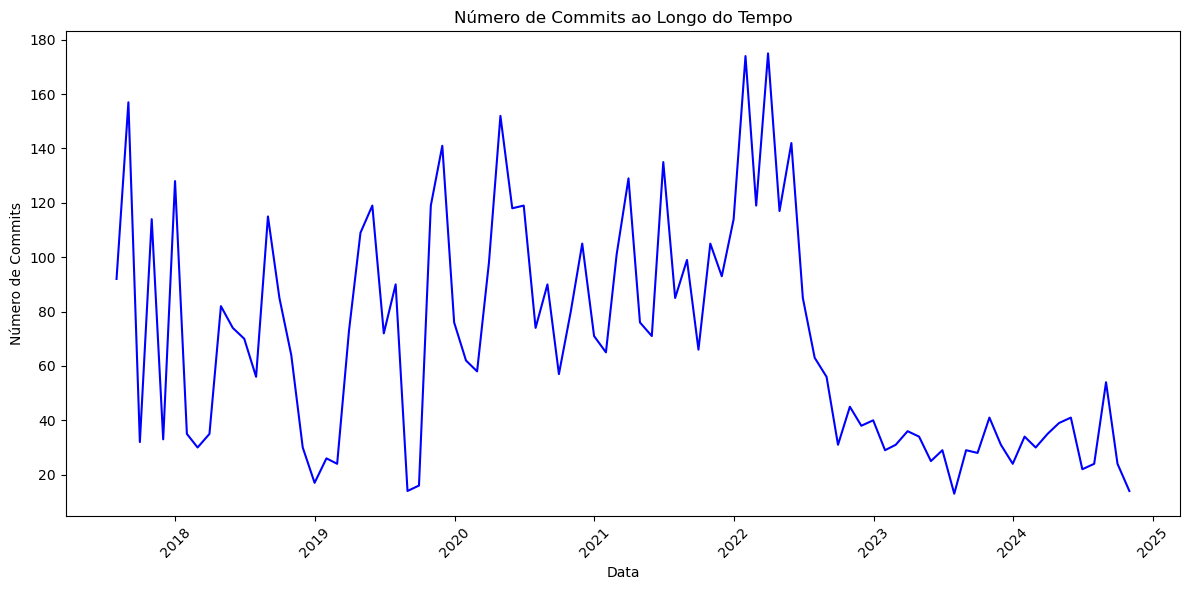

In [4]:
# Converter a coluna de data para datetime com timezone UTC
df_commits['author_date'] = pd.to_datetime(df_commits['author_date'], errors='coerce', utc=True)

# Remover linhas onde a conversão falhou (se houver)
df_commits = df_commits.dropna(subset=['author_date'])

# Definir a coluna de data como índice
df_commits.set_index('author_date', inplace=True)

# Agrupar por mês e contar o número de commits
monthly_pull_requests = df_commits.resample('M').size()

# Plotar o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_pull_requests.index, y=monthly_pull_requests.values, marker='', color='blue')
plt.title('Número de Commits ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Commits')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


0 valores inválidos em 'author_date'


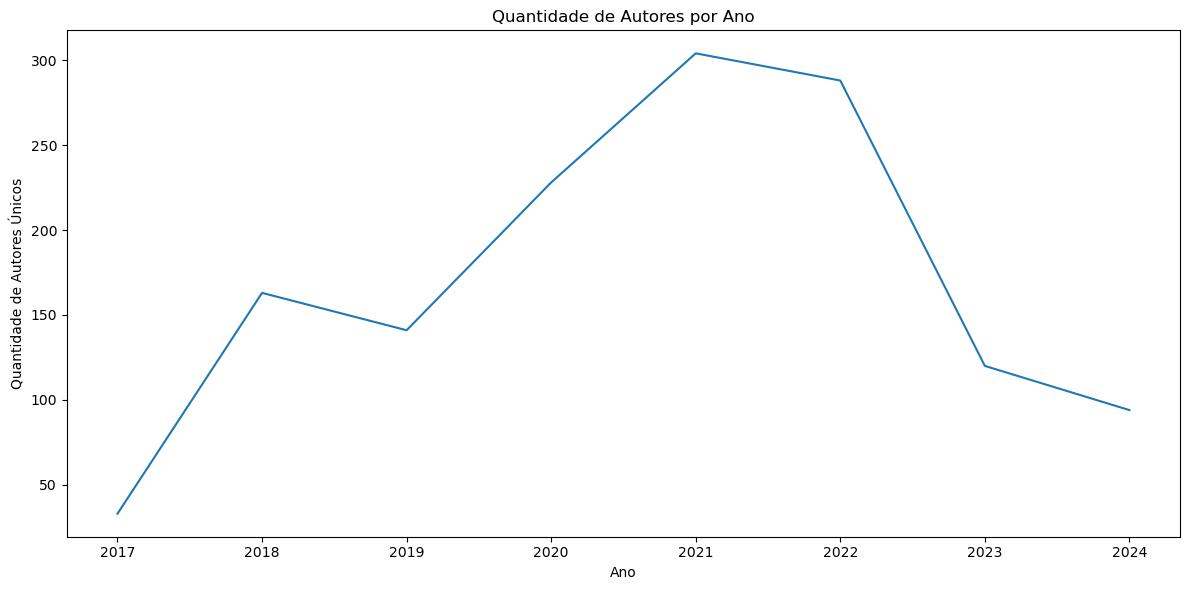

In [10]:
# Converter a coluna 'author_date' para datetime com fuso horário UTC
df_commits['author_date'] = pd.to_datetime(df_commits['author_date'], errors='coerce', utc=True)

# Verificar se há valores nulos após a conversão
print(df_commits['author_date'].isnull().sum(), "valores inválidos em 'author_date'")

# Remover linhas com valores inválidos (opcional)
df_commits = df_commits.dropna(subset=['author_date'])

# Extrair o ano da coluna 'author_date'
df_commits['year'] = df_commits['author_date'].dt.year

# Contar o número de autores únicos por ano
authors_per_year = df_commits.groupby('year')['author_email'].nunique()

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(authors_per_year.index, authors_per_year.values, marker='', linestyle='-')
plt.title('Quantidade de Autores por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Autores Únicos')
plt.xticks(authors_per_year.index)  # Garantir que todos os anos sejam mostrados no eixo X
plt.grid(False)
plt.tight_layout()

# Exibir o gráfico
plt.show()


0 valores inválidos em 'committer_date'


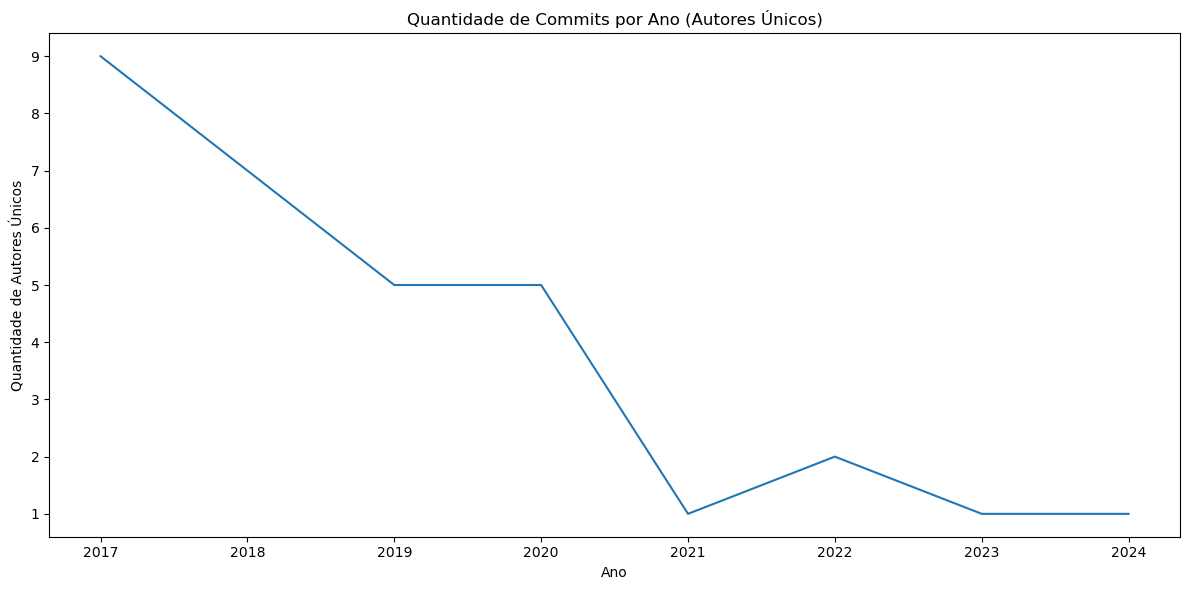

In [11]:
# Converter a coluna 'committer_date' para datetime com fuso horário UTC
df_commits['committer_date'] = pd.to_datetime(df_commits['committer_date'], errors='coerce', utc=True)

# Verificar se há valores nulos após a conversão
print(df_commits['committer_date'].isnull().sum(), "valores inválidos em 'committer_date'")

# Remover linhas com valores inválidos (opcional)
df_commits = df_commits.dropna(subset=['committer_date'])

# Extrair o ano da coluna 'committer_date'
df_commits['year'] = df_commits['committer_date'].dt.year

# Contar o número de autores (committer_email) únicos por ano
authors_per_year = df_commits.groupby('year')['committer_email'].nunique()

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(authors_per_year.index, authors_per_year.values, marker='', linestyle='-')
plt.title('Quantidade de Commits por Ano (Autores Únicos)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Autores Únicos')
plt.xticks(authors_per_year.index)  # Garantir que todos os anos sejam mostrados no eixo X
plt.grid(False)
plt.tight_layout()

# Exibir o gráfico
plt.show()
